<h1><center>FineTunning XGBoost</center></h1>

<i>Resources: <a href=https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/>Analytics vidhya tunning XGBoost</a>  </i>

<h2>Overview</h2>
    
XGBoost is a powerful machine learning algorithm especially where speed and accuracy are concerned
We need to consider different parameters and their values to be specified while implementing an XGBoost model
The XGBoost model requires parameter tuning to improve and fully leverage its advantages over other algorithms

<h2>Introduction</h2>


If things don’t go your way in predictive modeling, use XGboost.  XGBoost algorithm has become the ultimate weapon of many data scientist. It’s a highly sophisticated algorithm, powerful enough to deal with all sorts of irregularities of data.

Building a model using XGBoost is easy. But, improving the model using XGBoost is difficult (at least I struggled a lot). This algorithm uses multiple parameters. To improve the model, parameter tuning is must. It is very difficult to get answers to practical questions like – Which set of parameters you should tune ? What is the ideal value of these parameters to obtain optimal output ?

This article is best suited to people who are new to XGBoost. In this article, we’ll learn the art of parameter tuning along with some useful information about XGBoost. Also, we’ll practice this algorithm using a  data set in Python.

<h2>1. The XGBoost Advantage</h2>


1 - Regularization:
- Standard GBM implementation has no <a href=https://www.analyticsvidhya.com/blog/2015/02/avoid-over-fitting-regularization/>regularization</a> like XGBoost, therefore it also helps to reduce overfitting.
- In fact, XGBoost is also known as a ‘<b>regularized boosting</b>‘ technique.

2 - Parallel Processing:
- XGBoost implements parallel processing and is <b>blazingly</b> faster as compared to GBM.
- But hang on, we know that <a href=https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/>boosting</a> is a sequential process so how can it be parallelized? We know that each tree can be built only after the previous one, so what stops us from making a tree using all cores? Check this <a href=http://zhanpengfang.github.io/418home.html>link</a> out to explore further.

3 - XGBoost also supports implementation on Hadoop.
- High Flexibility
- XGBoost allows users to define <b>custom optimization objectives and evaluation criteria</b>.
- This adds a whole new dimension to the model and there is no limit to what we can do.

4 - Handling Missing Values
- XGBoost has an in-built routine to handle missing values.
- The user is required to supply a different value than other observations and pass that as a parameter. XGBoost tries different things as it encounters a missing value on each node and learns which path to take for missing values in future.

5 - Tree Pruning:
- A GBM would stop splitting a node when it encounters a negative loss in the split. Thus it is more of a <b>greedy algorithm</b>.
- XGBoost on the other hand make <b>splits upto the max_depth</b> specified and then start <b>pruning</b> the tree backwards and remove splits beyond which there is no positive gain.
- Another advantage is that sometimes a split of negative loss say -2 may be followed by a split of positive loss +10. GBM would stop as it encounters -2. But XGBoost will go deeper and it will see a combined effect of +8 of the split and keep both.

6 - Built-in Cross-Validation
- XGBoost allows user to run a <b>cross-validation</b> at each iteration of the boosting process and thus it is easy to get the exact optimum number of boosting iterations in a single run.
- This is unlike GBM where we have to run a grid-search and only a limited values can be tested.

7 - Continue on Existing Model
- User can start training an XGBoost model from its last iteration of previous run. This can be of significant advantage in certain specific applications.
- GBM implementation of sklearn also has this feature so they are even on this point.

You can refer to following web-pages for a deeper understanding:

<a href=http://xgboost.readthedocs.org/en/latest/model.html> XGBoost Guide – Introduction to Boosted Trees</a>

<a href='https://www.youtube.com/watch?v=X47SGnTMZIU' >Words from the Author of XGBoost [Video]</a>

<h2>2. XGBoost Parameters</h2>

The overall parameters have been divided into 3 categories by XGBoost authors:

- General Parameters: Guide the overall functioning
- Booster Parameters: Guide the individual booster (tree/regression) at each step
- Learning Task Parameters: Guide the optimization performed

Analogies to GBM are available <a href=https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/ >here</a> and highly recommend to read this article to learn from the very basics.

<h3><i>I - General Parameters</i></h3>

These define the overall functionality of XGBoost.

1 - <b>booster [default=gbtree]</b>

Select the type of model to run at each iteration. It has 2 options:
- gbtree: tree-based models
- gblinear: linear models

2 - <b>silent [default=0]</b>:
- Silent mode is activated is set to 1, i.e. no running messages will be printed.
- It’s generally good to keep it 0 as the messages might help in understanding the model.

3- <b>nthread [default to maximum number of threads available if not set]</b>
- This is used for parallel processing and number of cores in the system should be entered
- If you wish to run on all cores, value should not be entered and algorithm will detect automatically

There are 2 more parameters which are set automatically by XGBoost and you need not worry about them. Lets move on to Booster parameters.

<h3><i>II - Booster Parameters</i></h3>

1 - <b>eta [default=0.3]</b>

- Analogous to learning rate in GBM
- Makes the model more robust by shrinking the weights on each step
- Typical final values to be used: 0.01-0.2

2 - <b>min_child_weight [default=1]</b>

- Defines the minimum sum of weights of all observations required in a child.
- This is similar to <b>min_child_leaf</b> in GBM but not exactly. This refers to min “sum of weights” of observations while GBM has min “number of observations”.
- Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
- Too high values can lead to under-fitting hence, it should be tuned using Cross-Validation.

3 - <b>max_depth [default=6]</b>

- The maximum depth of a tree, same as GBM.
- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Should be tuned using Cross-Values.
- Typical values: 3-10

4 - <b>max_leaf_nodes</b>

- The maximum number of terminal nodes or leaves in a tree.
- Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
- If this is defined, XGBoost will ignore max_depth.

5 - <b>gamma [default=0]</b>

- A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
- Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

6 - <b>max_delta_step [default=0]</b>

- In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.
- Usually this parameter is not needed, but <b>it might help in logistic regression when class is extremely imbalanced</b>.
- This is generally not used but you can explore further if you wish.

7 - <b>subsample [default=1]</b>

- Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
- Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
- Typical values: 0.5-1

8 - <b>colsample_bytree [default=1]</b>

- Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
- Typical values: 0.5-1

9 - <b>colsample_bylevel [default=1]</b>

- Denotes the subsample ratio of columns for each split, in each level.
- Is it not use often because subsample and colsample_bytree will do the job.

10 - <b>lambda [default=1]</b>

- L2 regularization term on weights (analogous to Ridge regression)
- This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.

11- <b>alpha [default=0]</b>

- L1 regularization term on weight (analogous to Lasso regression)
- Can be used in case of very high dimensionality so that the algorithm runs faster when implemented

12 - <b>scale_pos_weight [default=1]</b>

- A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

<i><h3>III - Learning Task Parameters</h3></i>

1 - <b>objective [default=reg:linear]</b>

- This defines the loss function to be minimized. Mostly used values are:
    - binary:logistic –logistic regression for binary classification, returns predicted probability (not class)
    - multi:softmax –multiclass classification using the softmax objective, returns predicted class (not probabilities)
        - you also need to set an additional num_class (number of classes) parameter defining the number of unique classes
    - multi:softprob –same as softmax, but returns predicted probability of each data point belonging to each class.

2 - <b>eval_metric [ default according to objective ]</b>
- The metric to be used for validation data.
- The default values are rmse for regression and error for classification.
- Typical values are:
    - <b>rmse</b> – root mean square error
    - <b>mae</b> – mean absolute error
    - <b>logloss</b> – negative log-likelihood
    - <b>error</b> – Binary classification error rate (0.5 threshold)
    - <b>merror</b> – Multiclass classification error rate
    - <b>mlogloss</b> – Multiclass logloss
    - <b>auc</b>: Area under the curve
    
3 - <b>seed [default=0]</b>
- The random number seed.
- Can be used for generating reproducible results and also for parameter tuning.


IN sklearn this parameters are named:
- eta –> learning_rate
- lambda –> reg_lambda
- alpha –> reg_alpha

Recommendations: go through the following parts of xgboost guide to better understand the parameters and codes:

- <a href=http://xgboost.readthedocs.org/en/latest/parameter.html#general-parameters >XGBoost Parameters (official guide)</a>
- <a href=https://github.com/dmlc/xgboost/tree/master/demo/guide-python >XGBoost Demo Codes (xgboost GitHub repository)</a>
- <a href=http://xgboost.readthedocs.org/en/latest/python/python_api.html >Python API Reference (official guide)</a>

<h2>3. Parameter Tuning</h2>

In [158]:
#Import libraries:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics   #Additional scklearn functions    cross_validation,
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn import model_selection, preprocessing 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [ ]:
from custom_preprocessing import PreProcessing

---

<center><h2>Data</h2></center>

---

In [6]:
df = pd.read_csv("mails_clean.csv", sep=";")

In [7]:
TEXT = "mails"
LABEL= "label"

Using TensorFlow backend.


In [10]:
preproc = PreProcessing()

Welcome in the preprocessing


In [12]:
stop_word = np.loadtxt("stopwords-fr/stopwords-fr.txt", dtype=str)

In [13]:
df.loc[:,TEXT+"_sw"] = df.loc[:,TEXT].apply(lambda x : preproc.func_remove_stop_words(x, stop_word))

In [14]:
df[LABEL][df[LABEL]!="annulation"] = "other"

/home/chris/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df[LABEL].value_counts()

other         11585
annulation     9483
Name: label, dtype: int64

In [20]:
# split the dataset into training and validation datasets 
# ML classic 
train_x_sw, valid_x_sw, y_train_sw, y_valid_sw = model_selection.train_test_split(df[TEXT+"_sw"], df[LABEL], random_state=42, stratify=df[LABEL], test_size=0.2)

# For Embeddings
#train_x, valid_x, y_train, y_valid = model_selection.train_test_split(df[TEXT], df[LABEL], random_state=42, stratify=df[LABEL], test_size=0.2)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y_sw = encoder.fit_transform(y_train_sw)
valid_y_sw = encoder.fit_transform(y_valid_sw)
#train_y = encoder.fit_transform(y_train)
#valid_y = encoder.fit_transform(y_valid)

In [21]:
# Keep the unique label corresponding to their encoding correspondance
labels = df[LABEL].unique()
test=pd.DataFrame(data=np.transpose([labels,encoder.fit_transform(labels)]), columns=["labels", "encoding"]).sort_values(by=["encoding"])
labels=test.labels.tolist()

---

In [25]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df[TEXT]+"_sw")

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x_sw)
xvalid_count =  count_vect.transform(valid_x_sw)

In [26]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df[TEXT]+"_sw")
xtrain_tfidf =  tfidf_vect.transform(train_x_sw)
xvalid_tfidf =  tfidf_vect.transform(valid_x_sw)
print("word level tf-idf done")
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df[TEXT+"_sw"])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x_sw)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x_sw)
print("ngram level tf-idf done")
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char',  ngram_range=(2,3), max_features=5000) #token_pattern=r'\w{1,}',
tfidf_vect_ngram_chars.fit(df[TEXT+"_sw"])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x_sw) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x_sw) 
print("characters level tf-idf done")

word level tf-idf done
ngram level tf-idf done
characters level tf-idf done


---

<center><h2>Fine Tunning</h2></center>

---

In [82]:
import time

In [89]:
start = time.time()

In [90]:
def modelfit(alg, dtrain, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain, label=target)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, target, eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print( "\nModel Report")
    print( "Accuracy : %.4g" % metrics.accuracy_score(target, dtrain_predictions))
    print( "AUC Score (Train): %f" % metrics.roc_auc_score(target, dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [215]:
fit_params={"early_stopping_rounds":10, 
            "eval_metric" : ["error", "logloss"], 
            "eval_set" : [(xtrain_tfidf[:5000], train_y_sw[:5000]),(xvalid_tfidf, valid_y_sw)]}

In [216]:
param_test1 = {
 'max_depth':range(2,9,2),
 'min_child_weight':range(2,8,2)
}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=250, 
                                                  max_depth=5, 
                                                  min_child_weight=1, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                   
                                                  scale_pos_weight=1, 
                                                  seed=27), 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        iid=False, 
                        cv=5)

gsearch1.fit(xtrain_tfidf[:5000],  train_y_sw[:5000], **fit_params)

gsearch1.best_params_, gsearch1.best_score_

/home/chris/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[0]	validation_0-error:0.12420	validation_0-logloss:0.63754	validation_1-error:0.15781	validation_1-logloss:0.64233
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.11320	validation_0-logloss:0.58913	validation_1-error:0.14476	validation_1-logloss:0.59902
[2]	validation_0-error:0.10540	validation_0-logloss:0.55126	validation_1-error:0.13574	validation_1-logloss:0.56485
[3]	validation_0-error:0.10620	validation_0-logloss:0.51571	validation_1-error:0.13692	validation_1-logloss:0.53404
[4]	validation_0-error:0.10140	validation_0-logloss:0.48612	validation_1-error:0.13526	validation_1-logloss:0.50773
[5]	validation_0-error:0.09780	validation_0-logloss:0.45872	validation_1-error:0.13242	validation_1-logloss:0.48349
[6]	validation_0-error:0.09660	validation_0-logloss:0.43503	validation_1-error:0.13431	validation_1-logloss:0.46284
[7]	validation_0-error:

({'max_depth': 8, 'min_child_weight': 2}, 0.9575519204979841)

In [217]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 8, 'min_child_weight': 2}, 0.9575519204979841)

In [218]:
results = pd.DataFrame(gsearch1.cv_results_)

In [219]:
results[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 2, 'min_child_weight': 2}",0.952468,0.003101,11
1,"{'max_depth': 2, 'min_child_weight': 4}",0.952545,0.003394,10
2,"{'max_depth': 2, 'min_child_weight': 6}",0.951404,0.003565,12
3,"{'max_depth': 4, 'min_child_weight': 2}",0.957199,0.004449,3
4,"{'max_depth': 4, 'min_child_weight': 4}",0.957546,0.003658,2
5,"{'max_depth': 4, 'min_child_weight': 6}",0.956192,0.004007,8
6,"{'max_depth': 6, 'min_child_weight': 2}",0.957083,0.003529,5
7,"{'max_depth': 6, 'min_child_weight': 4}",0.957101,0.003477,4
8,"{'max_depth': 6, 'min_child_weight': 6}",0.957058,0.003376,6
9,"{'max_depth': 8, 'min_child_weight': 2}",0.957552,0.003533,1


In [220]:
param_test2 = {
 'max_depth':[gsearch1.best_params_["max_depth"]-1, gsearch1.best_params_["max_depth"], gsearch1.best_params_["max_depth"]+1],
 'min_child_weight':[gsearch1.best_params_["min_child_weight"]-1, gsearch1.best_params_["min_child_weight"], gsearch1.best_params_["min_child_weight"]+1]
}

gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, 
                                                  n_estimators=250, 
                                                  max_depth=5, 
                                                  min_child_weight=2, 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                   
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        iid=False, 
                        cv=5)

gsearch2.fit(xtrain_tfidf[:5000],  train_y_sw[:5000], **fit_params)


/home/chris/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[0]	validation_0-error:0.12280	validation_0-logloss:0.63803	validation_1-error:0.15971	validation_1-logloss:0.64320
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.12060	validation_0-logloss:0.59069	validation_1-error:0.15021	validation_1-logloss:0.60049
[2]	validation_0-error:0.10540	validation_0-logloss:0.55344	validation_1-error:0.13906	validation_1-logloss:0.56690
[3]	validation_0-error:0.10760	validation_0-logloss:0.51839	validation_1-error:0.13882	validation_1-logloss:0.53583
[4]	validation_0-error:0.10240	validation_0-logloss:0.48924	validation_1-error:0.13431	validation_1-logloss:0.51021
[5]	validation_0-error:0.10100	validation_0-logloss:0.46186	validation_1-error:0.13337	validation_1-logloss:0.48612
[6]	validation_0-error:0.10080	validation_0-logloss:0.43854	validation_1-error:0.13289	validation_1-logloss:0.46546
[7]	validation_0-error:

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=2,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
         

In [221]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 7, 'min_child_weight': 1}, 0.957854350954158)

In [222]:
results2 = pd.DataFrame(gsearch2.cv_results_)
print(results2[["params", "mean_test_score", "std_test_score", "rank_test_score"]])

                                    params  mean_test_score  std_test_score  \
0  {'max_depth': 7, 'min_child_weight': 1}         0.957854        0.004150   
1  {'max_depth': 7, 'min_child_weight': 2}         0.957620        0.003859   
2  {'max_depth': 7, 'min_child_weight': 3}         0.956765        0.003696   
3  {'max_depth': 8, 'min_child_weight': 1}         0.956899        0.003910   
4  {'max_depth': 8, 'min_child_weight': 2}         0.957552        0.003533   
5  {'max_depth': 8, 'min_child_weight': 3}         0.957823        0.003319   
6  {'max_depth': 9, 'min_child_weight': 1}         0.957434        0.003649   
7  {'max_depth': 9, 'min_child_weight': 2}         0.957446        0.003425   
8  {'max_depth': 9, 'min_child_weight': 3}         0.956831        0.004387   

   rank_test_score  
0                1  
1                3  
2                9  
3                7  
4                4  
5                2  
6                6  
7                5  
8                8  

In [223]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=250, 
                                                  max_depth=gsearch2.best_params_["max_depth"],
                                                  min_child_weight=gsearch2.best_params_["min_child_weight"], 
                                                  gamma=0, 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                  
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        iid=False, 
                        cv=5)

gsearch3.fit(xtrain_tfidf[:5000],  train_y_sw[:5000], **fit_params)

gsearch3.best_params_, gsearch3.best_score_


/home/chris/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[0]	validation_0-error:0.12280	validation_0-logloss:0.63804	validation_1-error:0.15971	validation_1-logloss:0.64320
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.12080	validation_0-logloss:0.59070	validation_1-error:0.15045	validation_1-logloss:0.60049
[2]	validation_0-error:0.10540	validation_0-logloss:0.55345	validation_1-error:0.13906	validation_1-logloss:0.56690
[3]	validation_0-error:0.10760	validation_0-logloss:0.51840	validation_1-error:0.13882	validation_1-logloss:0.53581
[4]	validation_0-error:0.10260	validation_0-logloss:0.48927	validation_1-error:0.13431	validation_1-logloss:0.51020
[5]	validation_0-error:0.10140	validation_0-logloss:0.46193	validation_1-error:0.13313	validation_1-logloss:0.48602
[6]	validation_0-error:0.10180	validation_0-logloss:0.43861	validation_1-error:0.13194	validation_1-logloss:0.46537
[7]	validation_0-error:

({'gamma': 0.3}, 0.9578773122567565)

In [224]:
results3 = pd.DataFrame(gsearch3.cv_results_)
print(results3[["params", "mean_test_score", "std_test_score", "rank_test_score"]])

           params  mean_test_score  std_test_score  rank_test_score
0  {'gamma': 0.0}         0.957854        0.004150                2
1  {'gamma': 0.1}         0.957503        0.005022                3
2  {'gamma': 0.2}         0.957298        0.004585                4
3  {'gamma': 0.3}         0.957877        0.003824                1
4  {'gamma': 0.4}         0.956821        0.004361                5


In [225]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=250, 
                                                  max_depth=gsearch2.best_params_["max_depth"],
                                                  min_child_weight=gsearch2.best_params_["min_child_weight"], 
                                                  gamma=gsearch3.best_params_["gamma"], 
                                                  subsample=0.8, 
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic', 
                                                   
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        iid=False,
                        cv=5)

gsearch4.fit(xtrain_tfidf[:5000],  train_y_sw[:5000], **fit_params)

gsearch4.best_params_, gsearch4.best_score_

/home/chris/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[0]	validation_0-error:0.14260	validation_0-logloss:0.64179	validation_1-error:0.18177	validation_1-logloss:0.64713
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.12440	validation_0-logloss:0.59662	validation_1-error:0.15021	validation_1-logloss:0.60545
[2]	validation_0-error:0.11800	validation_0-logloss:0.55790	validation_1-error:0.14381	validation_1-logloss:0.56998
[3]	validation_0-error:0.10320	validation_0-logloss:0.52221	validation_1-error:0.13076	validation_1-logloss:0.53837
[4]	validation_0-error:0.10580	validation_0-logloss:0.49639	validation_1-error:0.13431	validation_1-logloss:0.51627
[5]	validation_0-error:0.10620	validation_0-logloss:0.47213	validation_1-error:0.13621	validation_1-logloss:0.49417
[6]	validation_0-error:0.09820	validation_0-logloss:0.44765	validation_1-error:0.12696	validation_1-logloss:0.47210
[7]	validation_0-error:

({'colsample_bytree': 0.6, 'subsample': 0.8}, 0.9585108929103994)

In [226]:
results4 = pd.DataFrame(gsearch4.cv_results_)
print(results4[["params", "mean_test_score", "std_test_score", "rank_test_score"]])

                                         params  mean_test_score  \
0   {'colsample_bytree': 0.6, 'subsample': 0.6}         0.957796   
1   {'colsample_bytree': 0.6, 'subsample': 0.7}         0.957096   
2   {'colsample_bytree': 0.6, 'subsample': 0.8}         0.958511   
3   {'colsample_bytree': 0.6, 'subsample': 0.9}         0.957892   
4   {'colsample_bytree': 0.7, 'subsample': 0.6}         0.958010   
5   {'colsample_bytree': 0.7, 'subsample': 0.7}         0.957530   
6   {'colsample_bytree': 0.7, 'subsample': 0.8}         0.957736   
7   {'colsample_bytree': 0.7, 'subsample': 0.9}         0.957702   
8   {'colsample_bytree': 0.8, 'subsample': 0.6}         0.956526   
9   {'colsample_bytree': 0.8, 'subsample': 0.7}         0.956981   
10  {'colsample_bytree': 0.8, 'subsample': 0.8}         0.957877   
11  {'colsample_bytree': 0.8, 'subsample': 0.9}         0.957079   
12  {'colsample_bytree': 0.9, 'subsample': 0.6}         0.956743   
13  {'colsample_bytree': 0.9, 'subsample': 0.7} 

In [227]:
param_test6 = {
 'reg_alpha':[0, 1e-5, 1e-3, 1e-2, 0.05, 0.1, 1, 100] ,
 'reg_lambda':[0.1, 0.5, 1, 1.5, 2]
}


gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=250, 
                                                  max_depth=gsearch2.best_params_["max_depth"],
                                                  min_child_weight=gsearch2.best_params_["min_child_weight"], 
                                                  gamma=gsearch3.best_params_["gamma"], 
                                                  subsample=gsearch4.best_params_["subsample"], 
                                                  colsample_bytree=gsearch4.best_params_["colsample_bytree"],
                                                  objective= 'binary:logistic', 
                                                   
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test6, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        iid=False, 
                        cv=5)

gsearch6.fit(xtrain_tfidf[:5000],  train_y_sw[:5000], **fit_params)

gsearch6.best_params_, gsearch6.best_score_

/home/chris/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[0]	validation_0-error:0.14480	validation_0-logloss:0.64086	validation_1-error:0.18154	validation_1-logloss:0.64646
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.11840	validation_0-logloss:0.59526	validation_1-error:0.15282	validation_1-logloss:0.60452
[2]	validation_0-error:0.11900	validation_0-logloss:0.55740	validation_1-error:0.14998	validation_1-logloss:0.57010
[3]	validation_0-error:0.10080	validation_0-logloss:0.52139	validation_1-error:0.13147	validation_1-logloss:0.53847
[4]	validation_0-error:0.10860	validation_0-logloss:0.49556	validation_1-error:0.14120	validation_1-logloss:0.51638
[5]	validation_0-error:0.10780	validation_0-logloss:0.47123	validation_1-error:0.14072	validation_1-logloss:0.49457
[6]	validation_0-error:0.09760	validation_0-logloss:0.44664	validation_1-error:0.13123	validation_1-logloss:0.47228
[7]	validation_0-error:

({'reg_alpha': 0.1, 'reg_lambda': 0.5}, 0.9591046582972231)

In [228]:
results6 = pd.DataFrame(gsearch6.cv_results_)
results6[["params", "mean_test_score", "std_test_score", "rank_test_score"]]

                                     params  mean_test_score  std_test_score  \
0       {'reg_alpha': 0, 'reg_lambda': 0.1}         0.958215        0.004488   
1       {'reg_alpha': 0, 'reg_lambda': 0.5}         0.958299        0.004226   
2         {'reg_alpha': 0, 'reg_lambda': 1}         0.958511        0.003911   
3       {'reg_alpha': 0, 'reg_lambda': 1.5}         0.957927        0.003623   
4         {'reg_alpha': 0, 'reg_lambda': 2}         0.959018        0.003541   
5   {'reg_alpha': 1e-05, 'reg_lambda': 0.1}         0.958215        0.004488   
6   {'reg_alpha': 1e-05, 'reg_lambda': 0.5}         0.958299        0.004226   
7     {'reg_alpha': 1e-05, 'reg_lambda': 1}         0.958511        0.003911   
8   {'reg_alpha': 1e-05, 'reg_lambda': 1.5}         0.957927        0.003623   
9     {'reg_alpha': 1e-05, 'reg_lambda': 2}         0.959018        0.003541   
10  {'reg_alpha': 0.001, 'reg_lambda': 0.1}         0.958380        0.004156   
11  {'reg_alpha': 0.001, 'reg_lambda': 0

In [229]:
param_test7 = {
 'learning_rate':[0.01, 0.05, 0.1, 0.25, 0.5] 
}


gsearch7 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, 
                                                  n_estimators=250, 
                                                  max_depth=gsearch2.best_params_["max_depth"],
                                                  min_child_weight=gsearch2.best_params_["min_child_weight"], 
                                                  gamma=gsearch3.best_params_["gamma"], 
                                                  subsample=gsearch4.best_params_["subsample"], 
                                                  colsample_bytree=gsearch4.best_params_["colsample_bytree"],
                                                  objective= 'binary:logistic', 
                                                  reg_alpha= gsearch6.best_params_["reg_alpha"],
                                                  reg_lambda = gsearch6.best_params_["reg_lambda"],
                                                   
                                                  scale_pos_weight=1,
                                                  seed=27), 
                        param_grid = param_test7, 
                        scoring='roc_auc',
                        n_jobs=-1,
                        iid=False, 
                        cv=5)

gsearch7.fit(xtrain_tfidf[:5000],  train_y_sw[:5000], **fit_params)

gsearch7.best_params_, gsearch7.best_score_

/home/chris/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[0]	validation_0-error:0.14480	validation_0-logloss:0.64086	validation_1-error:0.18154	validation_1-logloss:0.64646
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 10 rounds.
[1]	validation_0-error:0.11840	validation_0-logloss:0.59526	validation_1-error:0.15282	validation_1-logloss:0.60452
[2]	validation_0-error:0.11900	validation_0-logloss:0.55740	validation_1-error:0.14998	validation_1-logloss:0.57010
[3]	validation_0-error:0.10080	validation_0-logloss:0.52139	validation_1-error:0.13147	validation_1-logloss:0.53847
[4]	validation_0-error:0.10860	validation_0-logloss:0.49556	validation_1-error:0.14120	validation_1-logloss:0.51638
[5]	validation_0-error:0.10780	validation_0-logloss:0.47123	validation_1-error:0.14072	validation_1-logloss:0.49457
[6]	validation_0-error:0.09760	validation_0-logloss:0.44664	validation_1-error:0.13123	validation_1-logloss:0.47228
[7]	validation_0-error:

({'learning_rate': 0.1}, 0.9591046582972231)

In [230]:
results7 = pd.DataFrame(gsearch7.cv_results_)
print(results7[["params", "mean_test_score", "std_test_score", "rank_test_score"]])

                    params  mean_test_score  std_test_score  rank_test_score
0  {'learning_rate': 0.01}         0.946806        0.005074                5
1  {'learning_rate': 0.05}         0.958222        0.004657                2
2   {'learning_rate': 0.1}         0.959105        0.004873                1
3  {'learning_rate': 0.25}         0.955972        0.004762                3
4   {'learning_rate': 0.5}         0.949301        0.002028                4


In [231]:
end = time.time()

In [232]:
print(f"""The best parameters are:
- learning_rate = {gsearch7.best_params_["learning_rate"]}, 
- max_depth = {gsearch2.best_params_["max_depth"]},
- min_child_weight = {gsearch2.best_params_["min_child_weight"]}, 
- gamma = {gsearch3.best_params_["gamma"]}, 
- subsample = {gsearch4.best_params_["subsample"]}, 
- colsample_bytree = {gsearch4.best_params_["colsample_bytree"]},
- reg_alpha = {gsearch6.best_params_["reg_alpha"]},
- reg_lambda = {gsearch6.best_params_["reg_lambda"]}
- execution time = {end - start} sec.
- Accuracy = {round(100*gsearch7.best_score_, 2)}%""")

The best parameters are:
- learning_rate = 0.1, 
- max_depth = 7,
- min_child_weight = 1, 
- gamma = 0.3, 
- subsample = 0.8, 
- colsample_bytree = 0.6,
- reg_alpha = 0.1,
- reg_lambda = 0.5
- execution time = 57289.20645022392 sec.
- Accuracy = 95.91%


In [204]:
model = XGBClassifier( learning_rate =gsearch7.best_params_["learning_rate"], 
                                                  n_estimators=250, 
                                                  max_depth=gsearch2.best_params_["max_depth"],
                                                  min_child_weight=gsearch2.best_params_["min_child_weight"], 
                                                  gamma=gsearch3.best_params_["gamma"], 
                                                  subsample=gsearch4.best_params_["subsample"], 
                                                  colsample_bytree=gsearch4.best_params_["colsample_bytree"],
                                                  objective= 'binary:logistic', 
                                                  reg_alpha= gsearch6.best_params_["reg_alpha"],
                                                  reg_lambda = gsearch6.best_params_["reg_lambda"],
                                                   
                                                  scale_pos_weight=1,
                                                  seed=27)

In [209]:
def func_xgb(X_train, y_train, X_test, y_test, labels, *params,**fit_params):
    model = XGBClassifier(*params)
    eval_set = [(X_train, y_train), (X_test, y_test)]
    if len(labels)>2:
        model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"],  eval_set=eval_set,early_stopping_rounds=10, verbose=False) #
    else:
        model.fit(X_train, y_train, eval_metric=["error", "logloss"],  eval_set=eval_set,early_stopping_rounds=10, verbose=False) #
    
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("\nAccuracy: %.2f%%" % (accuracy * 100.0))
    return model, y_pred, accuracy

def rmsle_eval(y, y0):
    
    y0=y0.get_label()    
    assert len(y) == len(y0)
    return 'error',np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0), 2)))


In [211]:
parameters={"learning_rate":gsearch7.best_params_["learning_rate"], 
            "n_estimators":1000,
            "max_depth":gsearch2.best_params_["max_depth"],
            "min_child_weight":gsearch2.best_params_["min_child_weight"], 
            "gamma":gsearch3.best_params_["gamma"], 
            "subsample":gsearch4.best_params_["subsample"], 
            "colsample_bytree":gsearch4.best_params_["colsample_bytree"],
            "objective": 'binary:logistic', 
            "reg_alpha":gsearch6.best_params_["reg_alpha"],
            "reg_lambda":gsearch6.best_params_["reg_lambda"],                                       
            "scale_pos_weight":1,
            "seed":27}

In [212]:
model, pred, accuracy =func_xgb(xtrain_tfidf[:5000],  train_y_sw[:5000], xvalid_tfidf, valid_y_sw, labels, **parameters, **fit_params)


Accuracy: 90.34%


In [235]:
from class_metric import Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [191]:
Metric = Metrics()


The precision of the model is 89.17%

Classification Report

              precision    recall  f1-score   support

  annulation       0.92      0.86      0.89      1897
       other       0.89      0.94      0.91      2317

    accuracy                           0.90      4214
   macro avg       0.91      0.90      0.90      4214
weighted avg       0.90      0.90      0.90      4214


Confusion Matrix



Model: f1-score=0.914 AUC=0.966




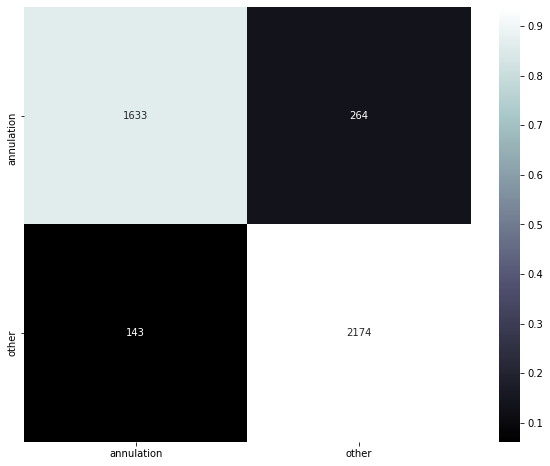

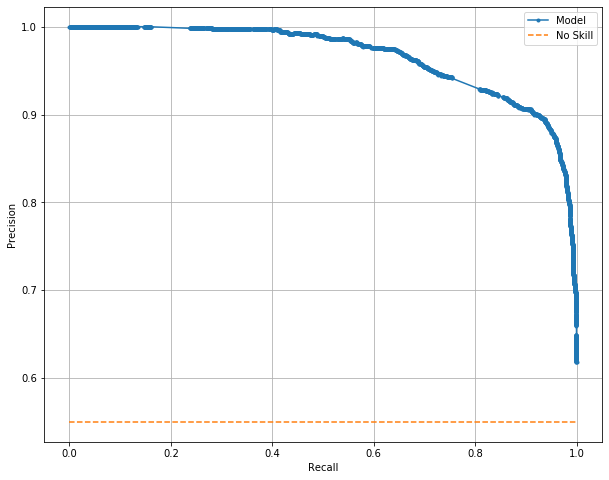




ROC AUC=0.960 



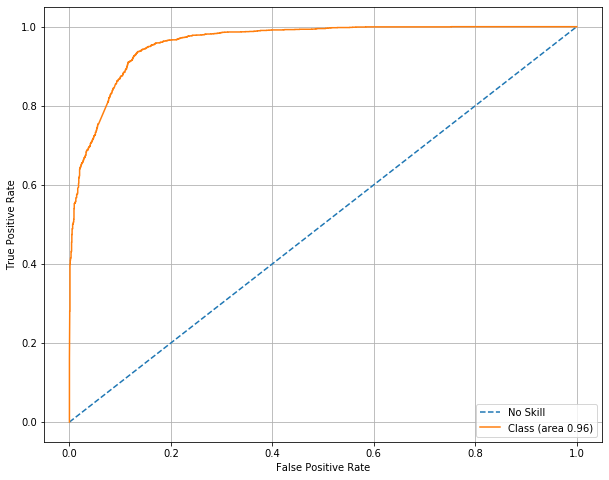


Evaluation Curves


Cohen's kappa: 80.38%




In [240]:

print(f"\nThe precision of the model is {round(100*precision_score(valid_y_sw, pred, labels),2)}%")
print("\nClassification Report\n")
print(classification_report(valid_y_sw, pred, target_names=labels))
cm = confusion_matrix(valid_y_sw, pred)
print("\nConfusion Matrix\n")
Metric.plot_confusion_matrix(cm, labels)
Metric.func_precision_recall_curve(model,  xvalid_tfidf.tocsc(), valid_y_sw,  labels,gb=True)
print("\n")
Metric.func_roc_auc_curve(model,  xvalid_tfidf.tocsc(), valid_y_sw, labels, gb=True)
print("\nEvaluation Curves")
#Metric.func_plot_eval_xgb(model, labels)
print(f"\n\nCohen's kappa: {round(100*cohen_kappa_score(valid_y_sw,  pred),2)}%\n\n")

In [ ]:
LSA -> modélisation du contenu 

<h3>All in One with ParameterGrid</h3>

In [ ]:
from sklearn.model_selection import ParameterGrid